In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()
sb.set(style = 'darkgrid')

In [2]:
d = pd.read_csv('insurance.csv')

In [3]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
d.shape

(1338, 7)

In [5]:
d.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EXPLORATORY DATA ANALYSIS

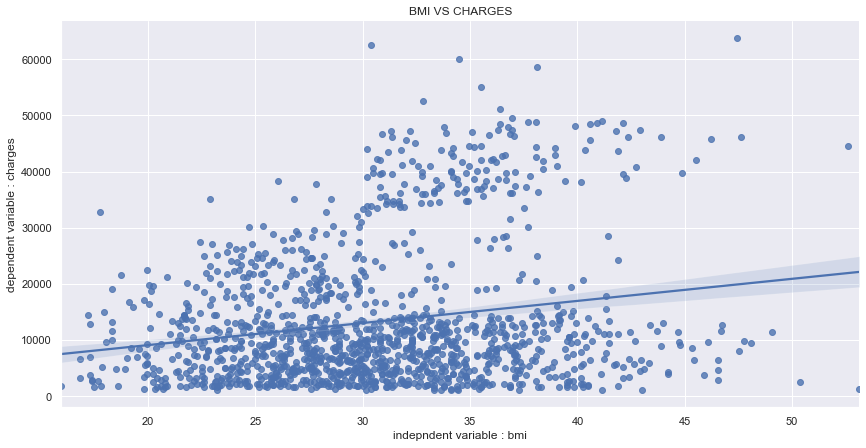

In [7]:
# For our visulization purpose we will fit a line using seaborn library only for bmi as independent variable and charges 
# as dependent variable

sb.lmplot(x = 'bmi', y = 'charges', data = d, aspect = 2, height = 6)
plt.xlabel('indepndent variable : bmi')
plt.ylabel('dependent variable : charges')
plt.title('BMI VS CHARGES')
plt.show()

<AxesSubplot:>

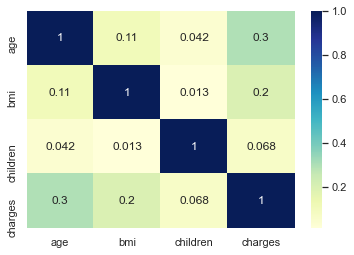

In [8]:
sb.heatmap(d.corr(), cmap = 'YlGnBu', annot = True)

# no correlation among the variables.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

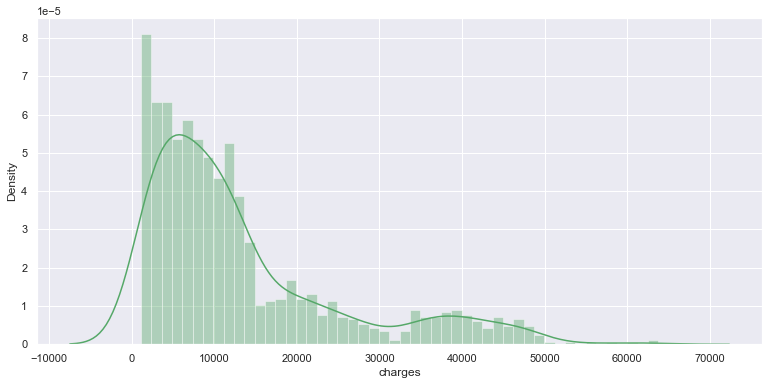

In [9]:
plt.figure(figsize = (13, 6))
sb.distplot(d['charges'], bins = 50, color = 'g')

# the plot is right skew.

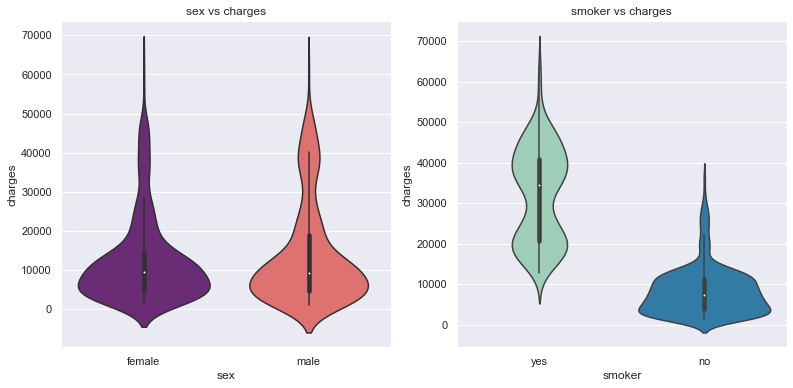

In [10]:
f = plt.figure(figsize = (13, 6))
ax = f.add_subplot(121)
sb.violinplot(x = 'sex', y = 'charges', data = d, palette = 'magma', ax = ax)
plt.title('sex vs charges')


ax = f.add_subplot(122)
sb.violinplot( x = 'smoker', y = 'charges', data = d, palette = 'YlGnBu', ax = ax)
plt.title('smoker vs charges')
plt.show()

#### From left plot it is clear that insurance charges are almost similar for both male and female, while on the right i shows that smoker has high insurance charges compare to non-smoker.

<AxesSubplot:xlabel='children', ylabel='charges'>

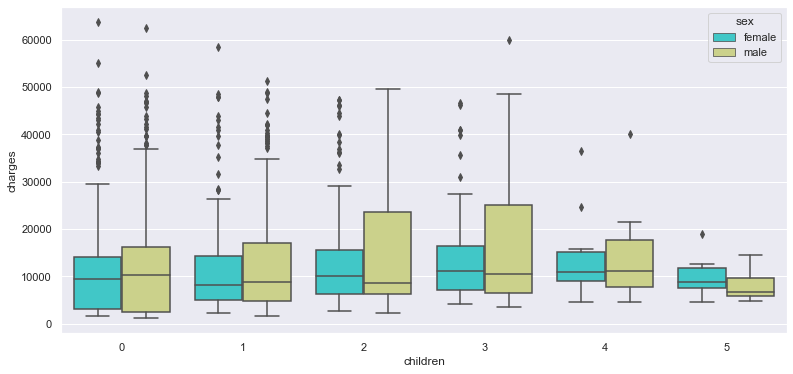

In [11]:
plt.figure(figsize = (13, 6))
sb.boxplot(x = 'children', y = 'charges', hue = 'sex', data = d, palette = 'rainbow')

<AxesSubplot:xlabel='children', ylabel='charges'>

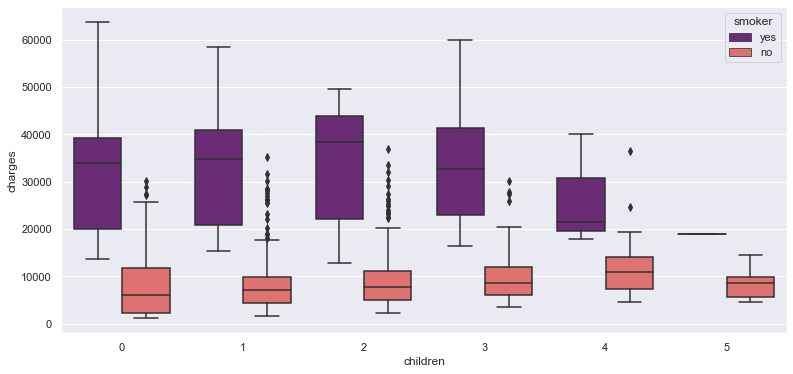

In [12]:
plt.figure(figsize = (13, 6))
sb.boxplot(x = 'children', y = 'charges', hue = 'smoker', data = d, palette = 'magma')

In [13]:
d.groupby('children')['charges'].agg(['mean', 'max', 'min'])

,mean,max,min
children,,,
0,12365.975602,63770.42801,1121.8739
1,12731.171832,58571.07448,1711.0268
2,15073.563734,49577.66240,2304.0022
3,15355.318367,60021.39897,3443.0640
4,13850.656311,40182.24600,4504.6624
5,8786.035247,19023.26000,4687.7970


<AxesSubplot:xlabel='region', ylabel='charges'>

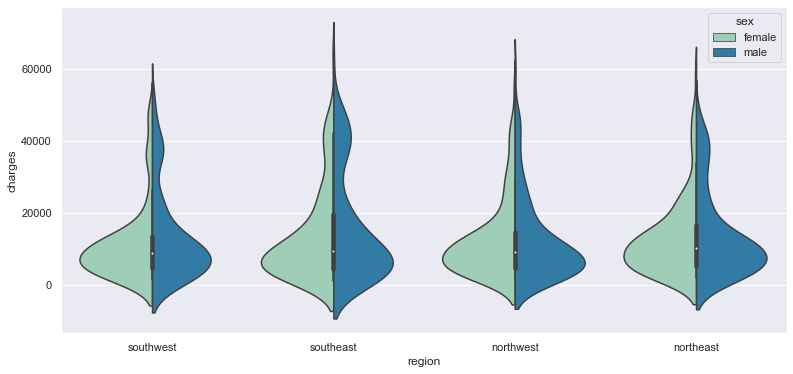

In [14]:
plt.figure(figsize = (13, 6))
sb.violinplot( x = 'region', y = 'charges', data = d, hue = 'sex',palette = 'YlGnBu', split = True)

<AxesSubplot:xlabel='region', ylabel='charges'>

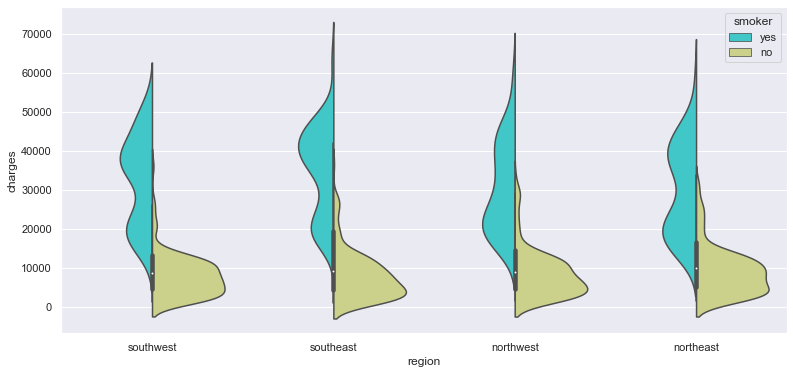

In [15]:
plt.figure(figsize = (13, 6))
sb.violinplot( x = 'region', y = 'charges', data = d, hue = 'smoker',palette = 'rainbow', split = True)

Text(0.5, 1.0, 'scatterplot of charges vs bmi')

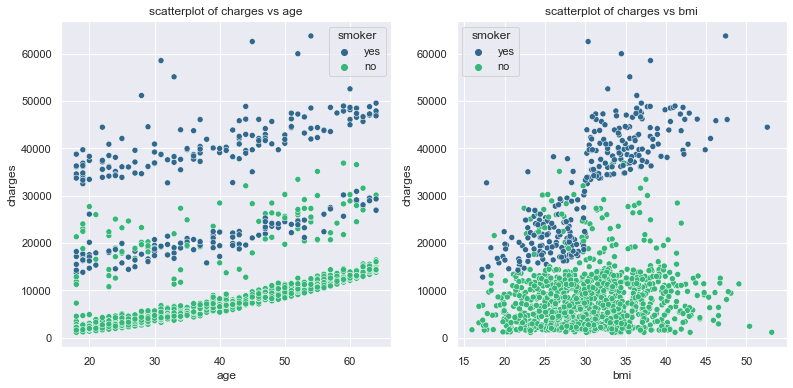

In [16]:
f = plt.figure(figsize = (13, 6))
ax = f.add_subplot(121)
sb.scatterplot(x = 'age', y = 'charges', data =d, palette = 'viridis', hue = 'smoker', ax =ax)
plt.title('scatterplot of charges vs age')


ax = f.add_subplot(122)
sb.scatterplot(x = 'bmi', y = 'charges', data =d, palette = 'viridis', hue = 'smoker', ax =ax)
plt.title('scatterplot of charges vs bmi')




Text(0.5, 1.0, 'scatterplot of charges vs bmi')

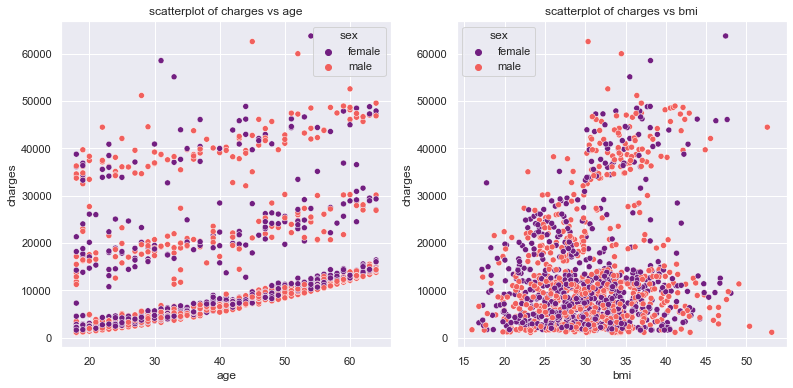

In [17]:
f = plt.figure(figsize = (13, 6))
ax = f.add_subplot(121)
sb.scatterplot(x = 'age', y = 'charges', data =d, palette = 'magma', hue = 'sex', ax =ax)
plt.title('scatterplot of charges vs age')


ax = f.add_subplot(122)
sb.scatterplot(x = 'bmi', y = 'charges', data =d, palette = 'magma', hue = 'sex', ax =ax)
plt.title('scatterplot of charges vs bmi')


# DATA PREPROCESSING

In [18]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
d = pd.get_dummies(data = d,
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [19]:
d.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [22]:
X = d.drop('charges', axis = 1) # independent variable
y = d['charges']  # dependent variable

In [23]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=100)

In [73]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1070, 12)
X_test shape (268, 12)
y_train shape (1070,)
y_test shape (268,)


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression()

In [77]:
y_predict = model.predict(X_test)

In [78]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y_test, y_predict)

0.7909644858714993

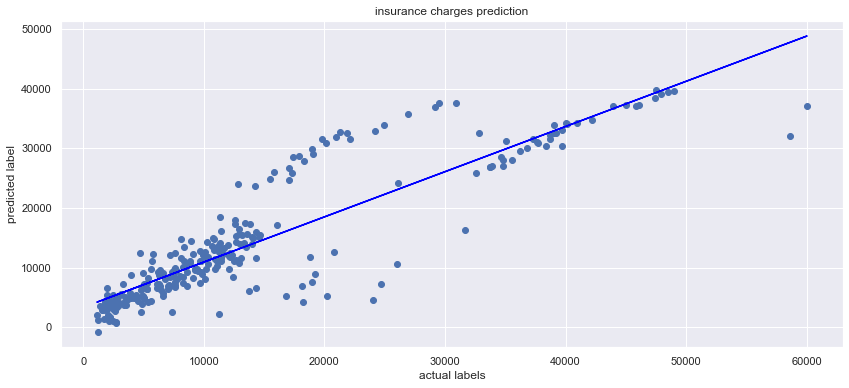

In [103]:
plt.figure(figsize = (14, 6))
plt.scatter(y_test, y_predict)
plt.xlabel('actual labels')
plt.ylabel('predicted label')
plt.title('insurance charges prediction')

z = np.polyfit(y_test, y_predict, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'blue')
plt.show()